### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
library(ggplot2)
library(scales)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
ny <- read.csv('new-york-city.csv')
wash <- read.csv('washington.csv')
chi <- read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1
Which stations are the most popular?

New York City

In [6]:
# Getting unique value counts of start and end stations
ny_starts <- table(ny$Start.Station)
ny_ends <- table(ny$End.Station)

# Convert tables to data frames
df_starts <- as.data.frame(ny_starts)
df_ends <- as.data.frame(ny_ends)

# Rename columns
colnames(df_starts) <- c("Station", "Count_starts")
colnames(df_ends) <- c("Station", "Count_ends")

# Merge data frames
combined_df <- merge(df_starts, df_ends, by = "Station", all = TRUE)

# Replace NA values with 0
combined_df[is.na(combined_df)] <- 0

# Create a new column with the sum of counts
combined_df$Sum <- combined_df$Count_starts + combined_df$Count_ends

# Sort the data frame by the sum in descending order
sorted_combined <- combined_df[order(combined_df$Sum, decreasing = TRUE),]

# Select the top 10 stations
top_10 <- head(sorted_combined, 10)

# Display the top 10 stations
print(top_10)

                  Station Count_starts Count_ends  Sum
474 Pershing Square North         3069       3077 6146
115    Broadway & E 22 St         2082       2343 4425
233    E 17 St & Broadway         2089       2316 4405
564       W 21 St & 6 Ave         2019       2036 4055
632 West St & Chambers St         1968       1968 3936
561      W 20 St & 11 Ave         1743       1932 3675
66        8 Ave & W 31 St         1741       1828 3569
67        8 Ave & W 33 St         1701       1734 3435
579       W 38 St & 8 Ave         1497       1628 3125
582       W 41 St & 8 Ave         1604       1506 3110


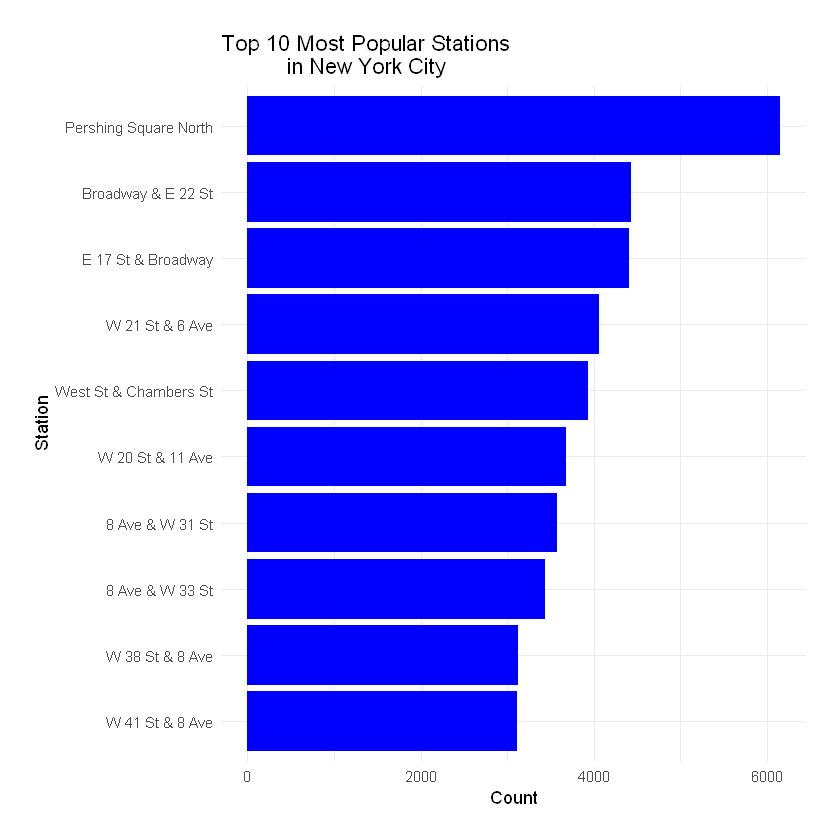

In [7]:
# Reverse the order so it works on the plot
top_10 <- top_10[order(top_10$Sum),]

# Create a horizontal bar plot using ggplot2
ggplot(top_10, aes(x = factor(Station, levels = top_10$Station), y = Sum, fill = "blue")) +
  geom_bar(stat = "identity") +
  labs(title = "Top 10 Most Popular Stations\n           in New York City",
       x = "Station",
       y = "Count") +
  theme_minimal() +
  theme(legend.position = "none", plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) +
  scale_fill_manual(values = "blue") +
  coord_flip()

Washington DC

In [8]:
# Getting unique value counts of start and end stations
wash_starts <- table(wash$Start.Station)
wash_ends <- table(wash$End.Station)

# Convert tables to data frames
df_starts <- as.data.frame(wash_starts)
df_ends <- as.data.frame(wash_ends)

# Rename columns
colnames(df_starts) <- c("Station", "Count_starts")
colnames(df_ends) <- c("Station", "Count_ends")

# Merge data frames
combined_df <- merge(df_starts, df_ends, by = "Station", all = TRUE)

# Replace NA values with 0
combined_df[is.na(combined_df)] <- 0

# Create a new column with the sum of counts
combined_df$Sum <- combined_df$Count_starts + combined_df$Count_ends

# Sort the data frame by the sum in descending order
sorted_combined <- combined_df[order(combined_df$Sum, decreasing = TRUE),]

# Select the top 10 stations
top_10 <- head(sorted_combined, 10)

# Display the top 10 stations
print(top_10)

                                                  Station Count_starts
209                       Columbus Circle / Union Station         5656
281                             Jefferson Dr & 14th St SW         5022
305                                      Lincoln Memorial         5043
320                  Massachusetts Ave & Dupont Circle NW         3946
50                                         15th & P St NW         3519
282                                    Jefferson Memorial         3514
422 Smithsonian-National Mall / Jefferson Dr & 12th St SW         3363
277           Henry Bacon Dr & Lincoln Memorial Circle NW         3121
141                                4th St & Madison Dr NW         3011
37                                         14th & V St NW         2788
    Count_ends   Sum
209       6048 11704
281       5218 10240
305       5036 10079
320       4483  8429
50        3733  7252
282       3637  7151
422       3599  6962
277       3101  6222
141       2920  5931
37       

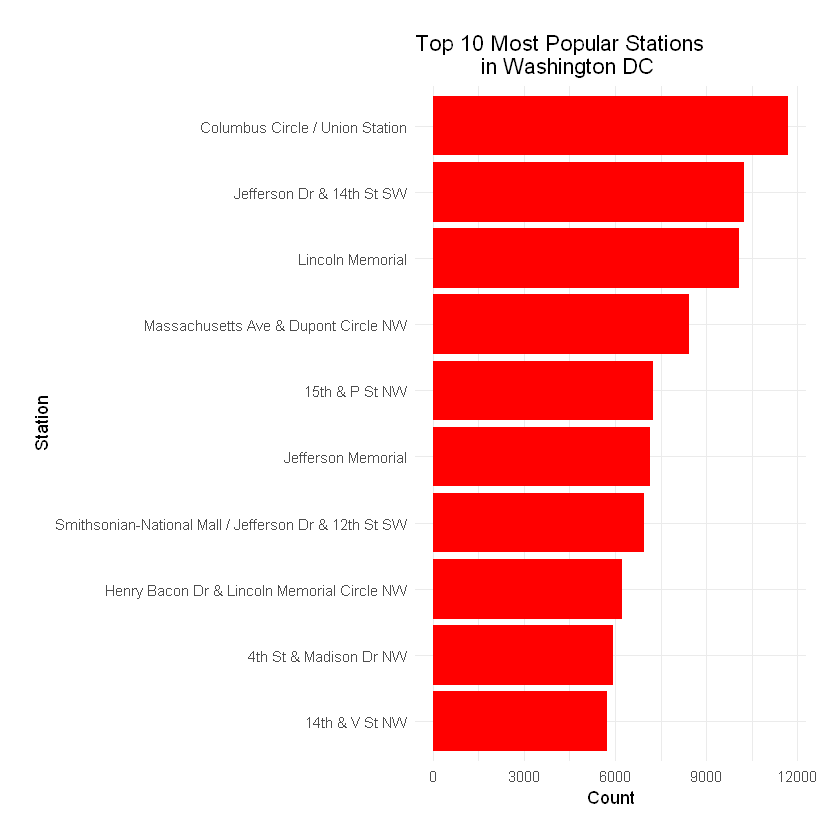

In [9]:
# Reverse the order so it works on the plot
top_10 <- top_10[order(top_10$Sum),]

# Create a horizontal bar plot using ggplot2
ggplot(top_10, aes(x = factor(Station, levels = top_10$Station), y = Sum, fill = "red")) +
  geom_bar(stat = "identity") +
  labs(title = "Top 10 Most Popular Stations\n           in Washington DC",
       x = "Station",
       y = "Count") +
  theme_minimal() +
  theme(legend.position = "none", plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) +
  scale_fill_manual(values = "red") +
  coord_flip()

Chicago

In [10]:
# Getting unique value counts of start and end stations
chi_starts <- table(chi$Start.Station)
chi_ends <- table(chi$End.Station)

# Convert tables to data frames
df_starts <- as.data.frame(chi_starts)
df_ends <- as.data.frame(chi_ends)

# Rename columns
colnames(df_starts) <- c("Station", "Count_starts")
colnames(df_ends) <- c("Station", "Count_ends")

# Merge data frames
combined_df <- merge(df_starts, df_ends, by = "Station", all = TRUE)

# Replace NA values with 0
combined_df[is.na(combined_df)] <- 0

# Create a new column with the sum of counts
combined_df$Sum <- combined_df$Count_starts + combined_df$Count_ends

# Sort the data frame by the sum in descending order
sorted_combined <- combined_df[order(combined_df$Sum, decreasing = TRUE),]

# Select the top 10 stations
top_10 <- head(sorted_combined, 10)

# Display the top 10 stations
print(top_10)

                         Station Count_starts Count_ends   Sum
503      Streeter Dr & Grand Ave         6911       7512 14423
136 Clinton St & Washington Blvd         4306       4166  8472
293    Lake Shore Dr & Monroe St         4289       4016  8305
132      Clinton St & Madison St         3744       4014  7758
294   Lake Shore Dr & North Blvd         3348       3863  7211
505          Theater on the Lake         3317       3559  6876
76           Canal St & Adams St         3443       3367  6810
354        Michigan Ave & Oak St         2869       3054  5923
356 Michigan Ave & Washington St         2778       3023  5801
360              Millennium Park         2728       3036  5764


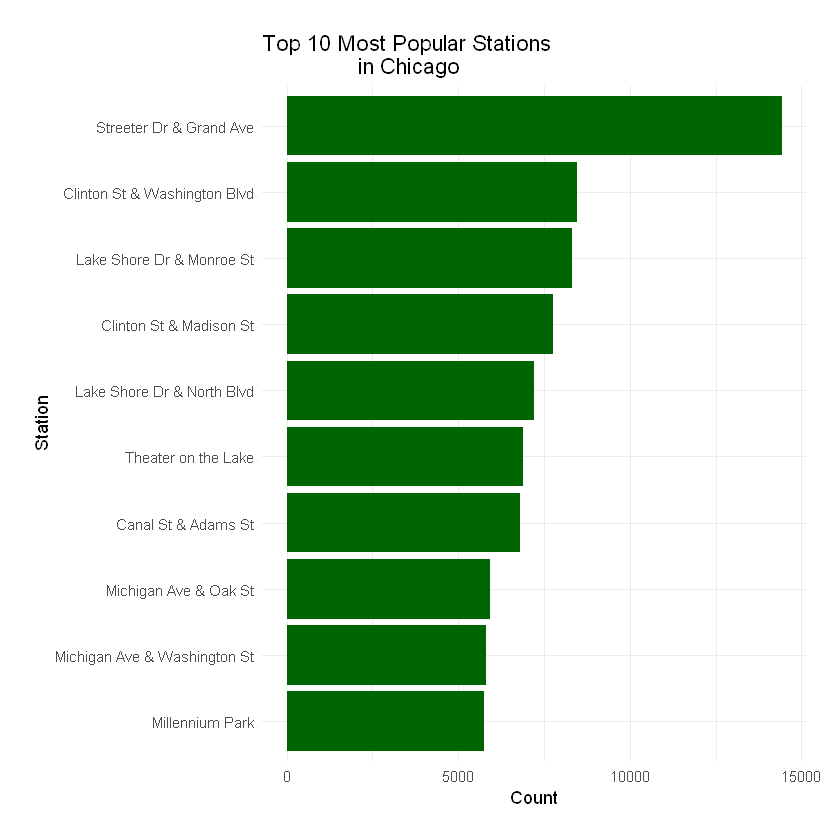

In [11]:
# Reverse the order so it works on the plot
top_10 <- top_10[order(top_10$Sum),]

# Create a horizontal bar plot using ggplot2
ggplot(top_10, aes(x = factor(Station, levels = top_10$Station), y = Sum, fill = "darkgreen")) +
  geom_bar(stat = "identity") +
  labs(title = "Top 10 Most Popular Stations\n                in Chicago",
       x = "Station",
       y = "Count") +
  theme_minimal() +
  theme(legend.position = "none", plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) +
  scale_fill_manual(values = "darkgreen") +
  coord_flip()

The most popular station in New York City is "Pershing Square North" with 6146 visits. This is next to Grand Central Station.
    
The most popular station in Washington DC is "Columbus Circle / Union Station" with 5656 visits. This is next to a train station North of the US Capitol building.
    
The most popular station in Chicago is "Streeter Dr & Grand Ave" with 14423 visits. This is right next to Navy Pier.

### Question 2
What is the gender breakdown of users per city?

New York City

In [12]:
ny_gender <- table(ny$Gender)
ny_gender
dimnames(ny_gender) <- list(Gender = c("No Answer","Female", "Male"))

# Convert table to numeric vector
ny_gender_vector <- as.numeric(ny_gender)

# Calculating the percentage of each gender
percentages <- prop.table(ny_gender_vector)


       Female   Male 
 29209  66783 204008 

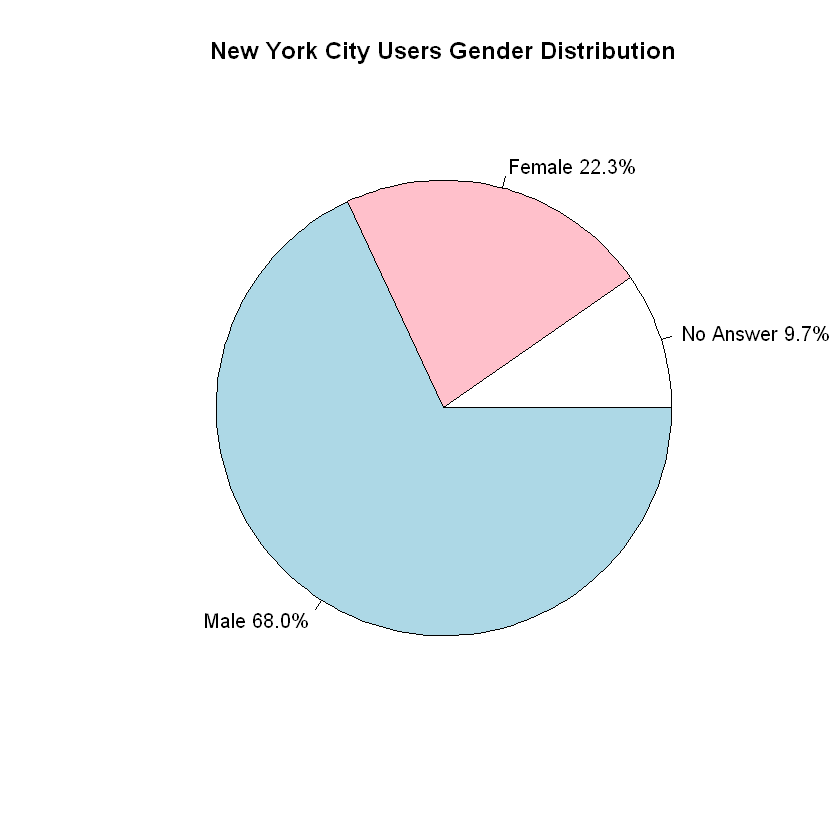

In [13]:
# Create a pie chart with percentages
custom_colors <- c("white", "pink", "lightblue")
pie(percentages, labels = paste(names(ny_gender), scales::percent(percentages)), col = custom_colors, main = "New York City Users Gender Distribution")

Washington DC doesn't have gender in their dataset

Chicago

In [14]:
chi_gender <- table(chi$Gender)
chi_gender
dimnames(chi_gender) <- list(Gender = c("No Answer","Female", "Male"))

# Convert table to numeric vector
chi_gender_vector <- as.numeric(chi_gender)

# Calculating the percentage of each gender
percentages <- prop.table(chi_gender_vector)


       Female   Male 
 61052  57758 181190 

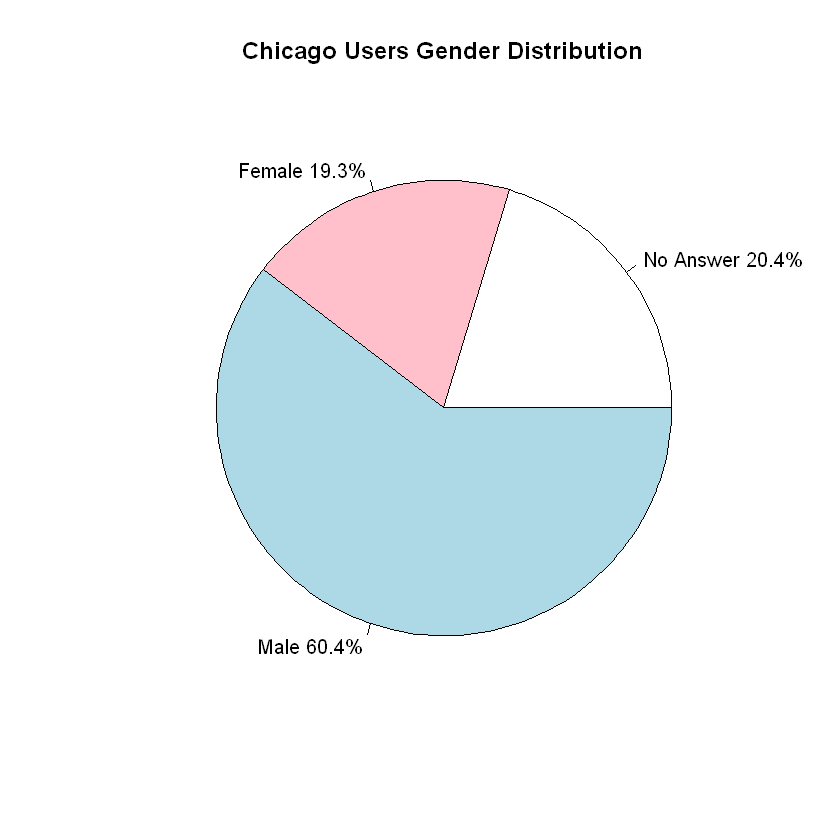

In [15]:
# Create a pie chart with percentages
custom_colors <- c("white", "pink", "lightblue")
pie(percentages, labels = paste(names(chi_gender), scales::percent(percentages)), col = custom_colors, main = "Chicago Users Gender Distribution")

The gender breakdown of users in New York City is 68% Male, 22.3% Female and 9.7% who didn't answer

The Washington DC dataset doesn't include gender.

The gender breakdown of users in Chicago is 60.4% Male, 19.3% Female and 20.4% who didn't answer

### Question 3
What is the averege trip duration by birth year?

New York City

In [16]:
# Group by birth year and calculate the average of trip duration
avg_tripd_by_birth_year <- aggregate(ny$Trip.Duration ~ ny$Birth.Year, ny = df, FUN = mean)

# Change column names
colnames(avg_tripd_by_birth_year) <- c("Birth_Year", "Average_Trip_Duration")

head(avg_tripd_by_birth_year)

# Checking min and max birth years
min(ny$Birth.Year, na.rm = TRUE)
max(ny$Birth.Year, na.rm = TRUE)

Birth_Year,Average_Trip_Duration
1885,744.8462
1886,1243.5000
1888,502.0000
1893,572.8750
1895,1203.0000
1899,1083.5385


[1] 1885

[1] 2001

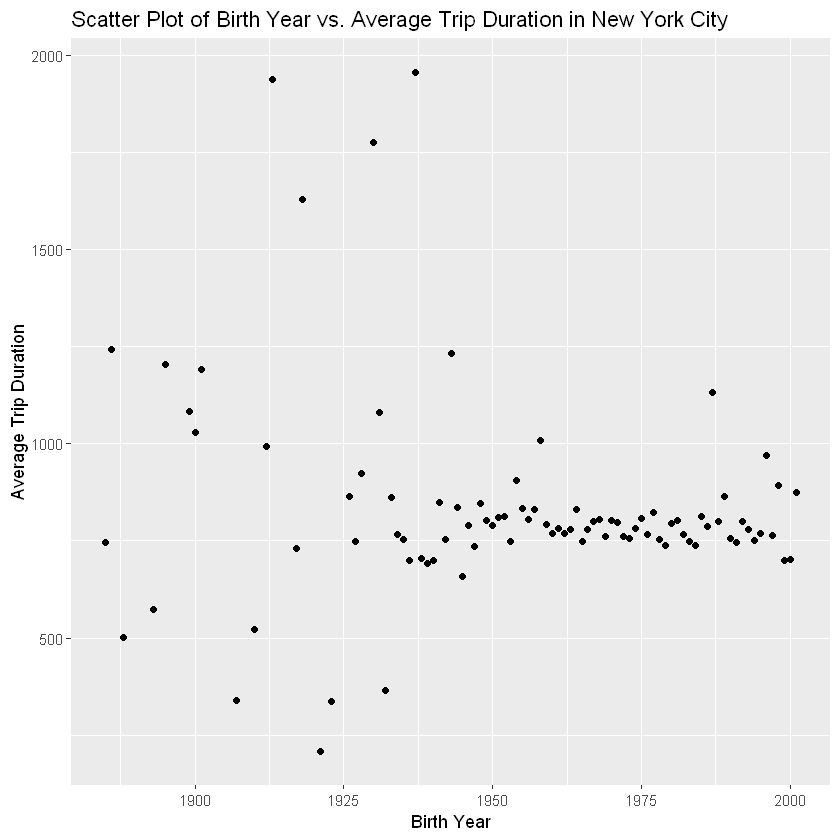

In [17]:
# Create a scatter plot
ggplot(avg_tripd_by_birth_year, aes(x = Birth_Year, y = Average_Trip_Duration)) +
  geom_point() +
  labs(title = "Scatter Plot of Birth Year vs. Average Trip Duration in New York City",
       x = "Birth Year",
       y = "Average Trip Duration")

Washington DC doesn't have birth year in their dataset

Chicago

In [18]:
# Group by birth year and calculate the average of trip duration
avg_tripd_by_birth_year <- aggregate(chi$Trip.Duration ~ chi$Birth.Year, chi = df, FUN = mean)

# Change column names
colnames(avg_tripd_by_birth_year) <- c("Birth_Year", "Average_Trip_Duration")

head(avg_tripd_by_birth_year)

# Checking min and max birth years
min(chi$Birth.Year, na.rm = TRUE)
max(chi$Birth.Year, na.rm = TRUE)

Birth_Year,Average_Trip_Duration
1899,513.7143
1900,1189.8824
1901,572.1111
1906,1063.7143
1909,1251.5000
1916,378.8000


[1] 1899

[1] 2016

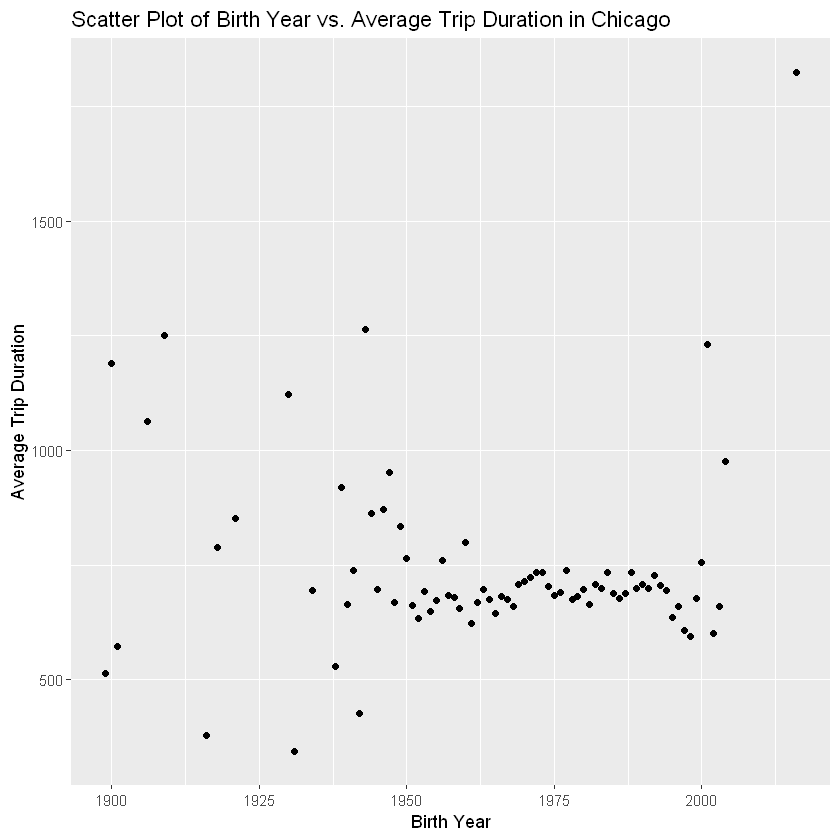

In [19]:
# Create a scatter plot
ggplot(avg_tripd_by_birth_year, aes(x = Birth_Year, y = Average_Trip_Duration)) +
  geom_point() +
  labs(title = "Scatter Plot of Birth Year vs. Average Trip Duration in Chicago",
       x = "Birth Year",
       y = "Average Trip Duration")

It seems like in both the New York City and Chicago datasets, there isn't much correlation between the age and trip duration. I believe there are probably some people who are lieing about their age since there are people who were born before 1900. The data is from 2017, I don't think there are many 117+ years old people riding bikes. It looks like a lot of people have a trip duration of about 10 minutes.

In [20]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')

[1] 65535